In [8]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
# sys.path.append("../test/")
sys.path.append("../datasets/")
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit
# from tester import dump_classifier_and_data
from pprint import pprint
%matplotlib inline
import numpy as np

In [9]:
### Load the dictionary containing the dataset
data_dict = pickle.load(open("/Users/seemamishra/Documents/Udacity/Intro to machine learning/ud120-projects/final_project/Enron Fraud Detection/datasets/final_project_dataset.pkl", "r"))

In [10]:
# features_list = [   'poi',
#                     'bonus',
#                     'salary',
#                     'deferral_payments',
#                     'deferred_income',
#                     'director_fees',
#                     'exercised_stock_options',
#                     'expenses',
#                     'total_payments',
#                     'total_stock_value',
#                     'from_messages',
#                     'from_poi_to_this_person',
#                     'from_this_person_to_poi',
#                     'loan_advances',
#                     'long_term_incentive',
#                     'other',
#                     'restricted_stock',
#                     'restricted_stock_deferred',
#                     'shared_receipt_with_poi',
#                     'to_messages'
#                    ]

features_list = ['deferral_payments',
                    'salary']
data_to_test = featureFormat(data_dict, features_list)


In [21]:
# s = np.cov(data_to_test)
# s= pd.DataFrame(s)
s= pd.DataFrame(data_to_test)
cov_s = s.cov()
invcovmx =sp.linalg.inv(cov_s)
invcovmx
s
 

,0,1
0,0.0,365788.0
1,1295738.0,267102.0
2,0.0,170941.0
3,0.0,243293.0
4,0.0,267093.0
5,1848227.0,0.0
6,0.0,370448.0
7,3131860.0,0.0
8,1130036.0,197091.0
9,2964506.0,130724.0


Automatically created module for IPython interactive environment


ValueError: x and y must have same first dimension, but have shapes (131,) and (92,)

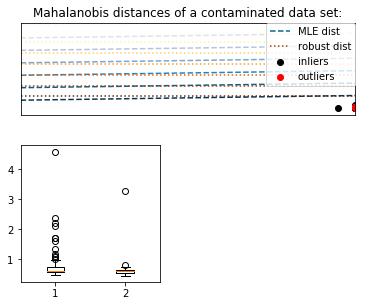

In [59]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 146
n_outliers = 15
n_features = 2
# d= data_to_test[0:2]
# # generate data
gen_cov = np.eye(n_features)
# gen_cov =np.cov(data_to_test)
gen_cov[0,0] = 2.
X = np.dot(data_to_test, gen_cov)
# # add some outliers
# outliers_cov = np.eye(n_features)
# outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
# X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

X = data_to_test
# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# #############################################################################
# Display results
fig = plt.figure()
plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
                              color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                               color='red', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE dist', 'robust dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())

# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
subfig2 = plt.subplot(2, 2, 3)
subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
subfig2.plot(1.26 * np.ones(n_samples - n_outliers),
             emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig2.plot(2.26 * np.ones(n_outliers),
             emp_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
plt.yticks(())

robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
subfig3 = plt.subplot(2, 2, 4)
subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
                widths=.25)
subfig3.plot(1.26 * np.ones(n_samples - n_outliers),
             robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig3.plot(2.26 * np.ones(n_outliers),
             robust_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
plt.yticks(())

plt.show()

In [51]:
d

array([[  0.00000000e+00,   6.00000000e+05,   3.65788000e+05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.42990000e+04,   1.06182700e+06,
          5.85062000e+05,   2.90000000e+01,   3.80000000e+01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.74000000e+03,   5.85062000e+05,   0.00000000e+00,
          7.02000000e+02,   8.07000000e+02],
       [  0.00000000e+00,   1.20000000e+06,   2.67102000e+05,
          1.29573800e+06,  -1.38605500e+06,   0.00000000e+00,
          6.68054400e+06,   1.12000000e+04,   5.63434300e+06,
          1.06232580e+07,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.58605500e+06,
          2.66030300e+06,   3.94271400e+06,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]])

In [13]:
X

array([[  0.00000000e+00,   6.00000000e+05,   3.65788000e+05, ...,
          0.00000000e+00,   7.02000000e+02,   8.07000000e+02],
       [  0.00000000e+00,   1.20000000e+06,   2.67102000e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   3.50000000e+05,   1.70941000e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   6.00000000e+05,   2.65214000e+05, ...,
          0.00000000e+00,   3.00000000e+02,   5.33000000e+02],
       [  0.00000000e+00,   8.00000000e+05,   2.78601000e+05, ...,
          0.00000000e+00,   7.72000000e+02,   8.65000000e+02],
       [  1.00000000e+00,   6.00000000e+05,   2.74975000e+05, ...,
          0.00000000e+00,   8.74000000e+02,   8.73000000e+02]])

In [18]:
robust_cov

MinCovDet(assume_centered=False, random_state=None, store_precision=True,
     support_fraction=None)

Automatically created module for IPython interactive environment


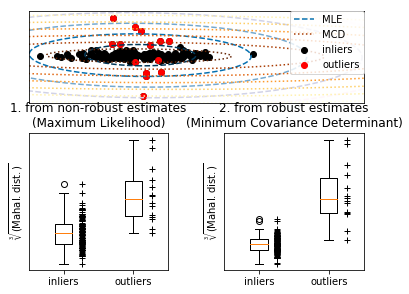

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 146
n_outliers = 14
n_features = 2

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# #############################################################################
# Display results
fig = plt.figure()
plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
                              color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                               color='red', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
# subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE', 'MCD', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())

# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
subfig2 = plt.subplot(2, 2, 3)
subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
subfig2.plot(1.26 * np.ones(n_samples - n_outliers),
             emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig2.plot(2.26 * np.ones(n_outliers),
             emp_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=10)
subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=10)
subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
plt.yticks(())

robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
subfig3 = plt.subplot(2, 2, 4)
subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
                widths=.25)
subfig3.plot(1.26 * np.ones(n_samples - n_outliers),
             robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig3.plot(2.26 * np.ones(n_outliers),
             robust_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=10)
subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=10)
subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
plt.yticks(())

plt.show()

In [34]:
emp_cov

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [22]:
X

array([[  6.88193931e-01,   2.94418083e-01],
       [ -3.12212409e+00,   7.41420947e-01],
       [  1.02693530e+00,   1.62669318e+00],
       [ -1.58020600e+00,   1.84482595e-01],
       [ -1.01812732e-01,   4.69250990e-01],
       [ -2.51923319e+00,  -4.98714075e-01],
       [  1.12200894e+00,  -2.61195751e+00],
       [  4.33297303e+00,   1.01705120e+00],
       [  1.10486885e-01,  -1.43264987e+00],
       [  2.05738581e+00,   1.73167353e-01],
       [ -9.22482123e-01,  -7.06880356e-01],
       [ -1.69812798e+00,   8.59388570e-01],
       [  6.55922007e-01,  -1.27899813e+00],
       [ -7.79002702e-01,   1.64063266e+00],
       [ -4.52934503e+00,   6.31029450e-01],
       [ -2.83494008e+00,  -1.11376947e+00],
       [ -5.99299021e+00,  -7.40038114e-01],
       [  3.92835210e-01,   6.59873029e-01],
       [  1.45182753e+00,   9.38793105e-02],
       [  1.98592252e+00,  -9.95772072e-01],
       [  4.65518838e+00,  -6.02049414e-01],
       [ -1.01278939e+00,   2.39416130e-01],
       [ -

In [24]:
gen_cov = np.eye(20)
gen_cov

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  

In [25]:
import scipy as sp
from scipy.spatial.distance import mahalanobis
 
d = s.apply(lambda x: (mahalanobis(s[0], s[1], invcovmx)), axis=1)

ValueError: ('shapes (107,) and (6,6) not aligned: 107 (dim 0) != 6 (dim 0)', u'occurred at index 0')

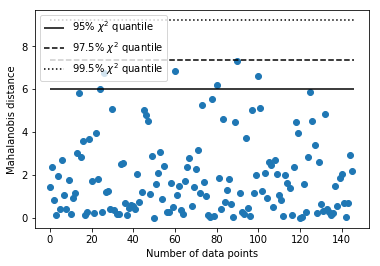

In [28]:
#imports and definitions
import numpy as np
import scipy.stats as stats
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
chi2 = stats.chi2
np.random.seed(111)


#covariance matrix: X and Y are normally distributed with std of 1
#and are independent one of another
covCircle = np.array([[1, 0.], [0., 1.]])
circle = np.random.multivariate_normal([0, 0], covCircle, 146) #1000 points around [0, 0]
mahalanobis = lambda p: distance.mahalanobis(p, [0, 0], covCircle.T)
d = np.array(map(mahalanobis, circle)) #Mahalanobis distance values for the 1000 points
d2 = d ** 2 #MD squared

degrees_of_freedom = 2

x = range( len( d2 ))

plt.subplot(111)

plt.scatter( x, d2 )

plt.hlines( chi2.ppf(0.95, degrees_of_freedom), 0, len(d2), label ="95% $\chi^2$ quantile", linestyles = "solid" ) 
plt.hlines( chi2.ppf(0.975, degrees_of_freedom), 0, len(d2), label ="97.5% $\chi^2$ quantile", linestyles="dashed" ) 
plt.hlines( chi2.ppf(0.99, degrees_of_freedom), 0, len(d2), label ="99.5% $\chi^2$ quantile", linestyles = "dotted" )

plt.legend()
plt.ylabel("Mahalanobis distance")
plt.xlabel("Number of data points")


plt.show()

In [4]:
len( d2 )


1000